 # Classification

## Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)
model

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model.C

1.0

In [7]:
model.verbose

0

In [8]:
model.intercept_, model.coef_

(array([-1.04608067]), array([[0.51491375]]))

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model.score(x, y)

0.9

In [12]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

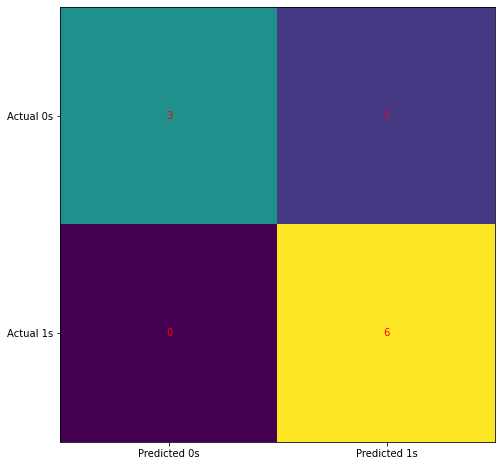

In [13]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [14]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [15]:
model = LogisticRegression(solver='liblinear', random_state=0, C=10.0)
model

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [16]:
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
model.intercept_, model.coef_

(array([-3.51335372]), array([[1.12066084]]))

In [18]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [19]:
model.score(x,y)

1.0

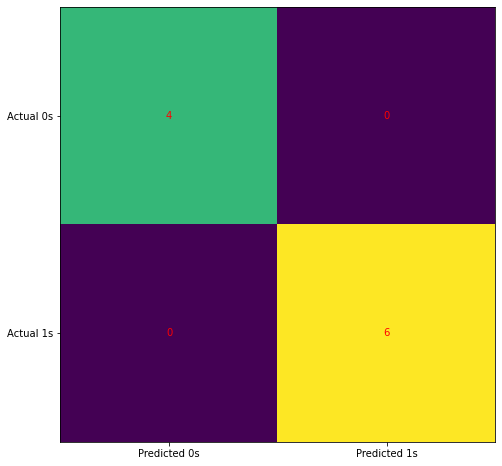

In [20]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [21]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [22]:
# Handwriting Recognition

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
x, y = load_digits(return_X_y=True)

In [24]:
x,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                    random_state=0
                                                   )

In [26]:
x_train.shape, y_train.shape

((1437, 64), (1437,))

In [27]:
x_test.shape, y_test.shape

((360, 64), (360,))

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.        , -0.33790435, -1.09141592, ...,  1.58325794,
         3.53125595,  3.30213343],
       [ 0.        ,  2.90642897,  1.41696421, ...,  1.58325794,
         0.00595786, -0.18695903],
       [ 0.        ,  0.74354009,  0.99890086, ..., -1.14493411,
        -0.49765616, -0.18695903],
       ...,
       [ 0.        , -0.33790435, -0.04625753, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435, -0.25528921, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435,  0.16277415, ...,  0.73069792,
        -0.49765616, -0.18695903]])

In [29]:
x_train.mean(), x_train.std()

(1.5451955805499744e-19, 0.9762812094883321)

In [30]:
model = LogisticRegression(
    solver='liblinear',
    C=0.05,
    multi_class='ovr',
    random_state=0
)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [31]:
x_test = scaler.transform(x_test)

In [32]:
y_pred = model.predict(x_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

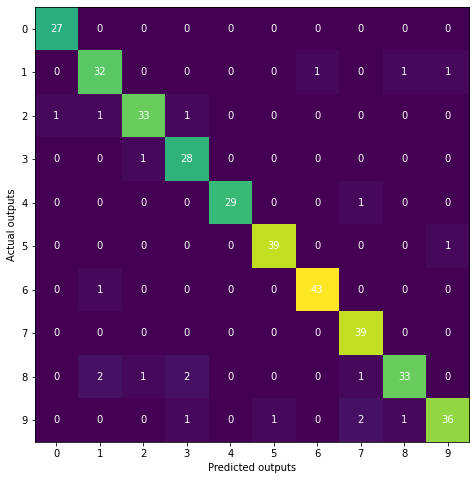

In [34]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)

for i in range(10):
	for j in range(10):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
# plt.show()


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## KNN

In [36]:
weather = [
    'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy',
    'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast',
    'Overcast', 'Rainy'
]
temp = [
    'Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild',
    'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'
]
play = [
    'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 
    'Yes', 'Yes', 'Yes', 'Yes', 'No'
]

In [37]:
# Import LabelEncoder
from sklearn import preprocessing

# buat label endocer
le = preprocessing.LabelEncoder()

# konversi string label menjadi nomor
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [38]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
print(temp_encoded, label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2] [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [39]:
# Mengkombinasikan weather dan temp menjadi satu list tuple
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [40]:
# Classifier model KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train model
model.fit(features, label)

# Kita coba prediksi
predicted = model.predict([[0,2]])

print(predicted)

[1]


In [41]:
"""
Mempelajari KNN dengan multible Labels
"""

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [42]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [43]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [44]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [45]:
# Periksa record set target
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [46]:
# cek shape
print(wine.data.shape)

(178, 13)


In [47]:
print(wine.target.shape)

(178,)


In [48]:
# Splitting Data
from sklearn.model_selection import train_test_split

#split dataset
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                    wine.target, 
                                                    test_size=0.3)

In [49]:
# Import knearest neigbors
from sklearn.neighbors import KNeighborsClassifier

# Buat KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan training sets
knn.fit(X_train, y_train)

# predict response
y_pred = knn.predict(X_test)

In [50]:
from sklearn import metrics

# Model akurasi
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6851851851851852


In [51]:
# Mari kita coba untuk meninggikan akurasi
# Import knearest neigbors
from sklearn.neighbors import KNeighborsClassifier

# Buat KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Melatih model dengan training sets
knn.fit(X_train, y_train)

# predict response
y_pred = knn.predict(X_test)

In [52]:
from sklearn import metrics

# Model akurasi
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


In [53]:
# mencari nilai k yang sesuai
error = []

for i in range(1, 40):
    knn = knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


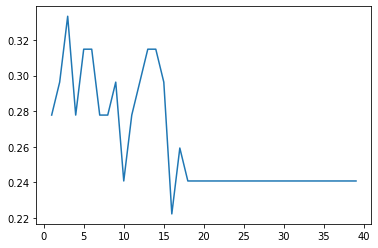

In [54]:
plt.plot(range(1,40), error)

In [55]:
# Dari atas itu, berarti yang paling bagus yaitu k=23
# Mari kita coba untuk meninggikan akurasi

# Import knearest neigbors
from sklearn.neighbors import KNeighborsClassifier

# Buat KNN Classifier
knn = KNeighborsClassifier(n_neighbors=23)

# Melatih model dengan training sets
knn.fit(X_train, y_train)

# predict response
y_pred = knn.predict(X_test)

In [56]:
from sklearn import metrics

# Model akurasi
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593
